Colab Link: https://colab.research.google.com/drive/1NvGS0FUB1oyWOBHY5Cb2tCuDmODiHrx_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# set display options
np.set_printoptions(precision=5)

## Simple Linear Regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Data Prep

#### Generate

In [18]:
# Generate input data
np.random.seed(100)

n_samples = 30

X = np.linspace(0, 10, n_samples)
print(X)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [19]:
# Set a regression function
f1 = lambda x: 1.5 + np.pi * x
# Use regression function to generate some ouput values
y = f1(X)
print(y)

[ 1.5         2.58330781  3.66661562  4.74992343  5.83323125  6.91653906
  7.99984687  9.08315468 10.16646249 11.2497703  12.33307812 13.41638593
 14.49969374 15.58300155 16.66630936 17.74961717 18.83292499 19.9162328
 20.99954061 22.08284842 23.16615623 24.24946404 25.33277185 26.41607967
 27.49938748 28.58269529 29.6660031  30.74931091 31.83261872 32.91592654]


In [26]:
# Add some noise to the output data
y += np.random.randn(n_samples) * 0.5
print(y)

[ 1.26124671  1.93023539  3.51904663  5.10766323  6.40471778  6.79140936
  8.63889394  8.0238376   9.4503638  10.68455334 11.96925314 13.16933276
 14.38663201 15.4399016  17.45072756 16.86218713 18.23501386 20.30093321
 20.10512423 22.5945417  22.89594377 24.28291198 24.81237295 25.83362634
 27.59072295 29.02401653 29.3810895  31.64635701 31.72756549 32.482196  ]


In [21]:
# Convert input to a feature vector
X = np.transpose([X])
print(X)

[[ 0.        ]
 [ 0.34482759]
 [ 0.68965517]
 [ 1.03448276]
 [ 1.37931034]
 [ 1.72413793]
 [ 2.06896552]
 [ 2.4137931 ]
 [ 2.75862069]
 [ 3.10344828]
 [ 3.44827586]
 [ 3.79310345]
 [ 4.13793103]
 [ 4.48275862]
 [ 4.82758621]
 [ 5.17241379]
 [ 5.51724138]
 [ 5.86206897]
 [ 6.20689655]
 [ 6.55172414]
 [ 6.89655172]
 [ 7.24137931]
 [ 7.5862069 ]
 [ 7.93103448]
 [ 8.27586207]
 [ 8.62068966]
 [ 8.96551724]
 [ 9.31034483]
 [ 9.65517241]
 [10.        ]]


### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build Model and Predict

In [9]:
from sklearn.linear_model import LinearRegression

In [28]:
# With Intercept
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print (lr.intercept_)
print (lr.coef_)
print ('Estimated function: y = {:.4f} + {:.4f}x'.format(lr.intercept_, lr.coef_[0]))

1.2759795838851087
[3.15987606]
Estimated function: y = 1.2760 + 3.1599x


In [33]:
# Without Intercept
lr_no_intercept = LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X_train, y_train)
print (lr_no_intercept.intercept_)
print (lr_no_intercept.coef_)
print ('Estimated function: y = {:.4f} + {:.4f}x'.format(lr_no_intercept.intercept_, lr_no_intercept.coef_[0]))

0.0
[3.35656404]
Estimated function: y = 0.0000 + 3.3566x


In [30]:
# Predict
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

### Vizualize

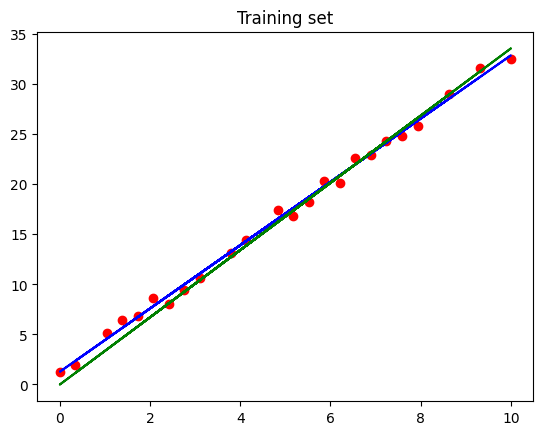

In [34]:
# Vizualize the training set
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
# regressor without intercept
plt.plot(X_train, lr_no_intercept.predict(X_train), color = 'green')
plt.title('Training set')
plt.show()

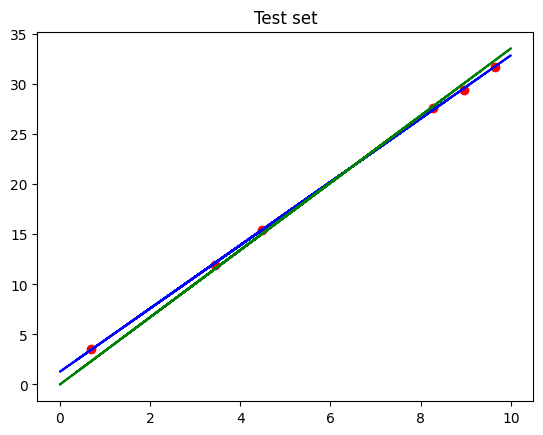

In [35]:
# Vizualize the test set
plt.scatter(X_test, y_test, color='red')
# Since the regression line is the same, we can plot it using the train data itself
plt.plot(X_train, lr.predict(X_train), color = 'blue') 
# plt.plot(X_test, lr.predict(X_test), color = 'blue')   # same as above
# regressor without intercept
plt.plot(X_train, lr_no_intercept.predict(X_train), color = 'green')
plt.title('Test set')
plt.show()

### Predict output for a single value

In [36]:
# Note:
# The "predict" method always expects a 2D array as the format of its inputs. 
# And putting the value into a double pair of square brackets makes the input a 2D array. 
# For instance:
# 3.3→scalar 
# [3.3]→1D array 
# [[3.3]]→2D array
print(lr.predict([[3.3]]))

[11.70357058]


## Multiple Linear Regression

### Data Prep

#### Read

In [53]:
dataset = pd.read_csv('data/Multiple_linear_Reg_data.csv')
dataset.head(2)

,R&D Spend,Administration,Marketing Spend,Country,Profit
0,165349.2,136897.80,471784.10,United States,192261.83
1,162597.7,151377.59,443898.53,Canada,191792.06


In [54]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(50, 4)
<class 'numpy.ndarray'>
(50,)


#### Encoding categorical data

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The third parameter for transformers below is the index of the column that needs to be encoded - IT IS NOT THE ACTUAL DATA
# remainder='passthrough' ensures that the rest of the columns are passed as it. 
# Without this parameter, the rest of the columns will be dropped
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# print("X Values: ", X)

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build Model and Predict

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# With Intercept (Default)
lr = LinearRegression()
lr.fit(X_train, y_train)
print (lr.intercept_)
print (lr.coef_)

42467.529248579056
[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]


In [305]:
# Predict
y_pred = lr.predict(X_test)
type(y_pred), y_pred.shape

(numpy.ndarray, (1914, 1))

### Check Predictions

In [60]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test.shape)
print("\nPredicted array shape before change: ", y_pred.shape)
y_pred = y_pred.reshape(len(y_pred),1)
print("Predicted array shape after change: ", y_pred.shape)

Test array shape before change:  (10,)
Test array shape after change:  (10, 1)

Predicted array shape before change:  (10,)
Predicted array shape after change:  (10, 1)


In [61]:
# Print test and pred arrays side by side
comp_df = pd.DataFrame(np.concatenate((y_test,y_pred, y_test-y_pred),axis=1))
comp_df.columns = ['test','pred','test-pred']
comp_df

,test,pred,test-pred
0,103282.38,103015.201598,267.178402
1,144259.40,132582.277608,11677.122392
2,146121.95,132447.738452,13674.211548
3,77798.83,71976.098513,5822.731487
4,191050.39,178537.482211,12512.907789
5,105008.31,116161.242302,-11152.932302
6,81229.06,67851.692097,13377.367903
7,97483.56,98791.733747,-1308.173747
8,110352.25,113969.435330,-3617.185330
9,166187.94,167921.065695,-1733.125695


### Evaluate

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473281415

### Predict output for a single value

In [63]:
print(lr.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


### Backward Eliminition
https://www.statsmodels.org/stable/index.html

In [36]:
import statsmodels.api as sm
# Statsmodel does not take into account the constant (intercept).
# So we need to add it in the form b0x0 where x0 is an array of 1s

# Here X is the array after one hot encoding the independent variable
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [37]:
X.shape

(50, 6)

In [38]:
# Start the backward elimination by including the indices for all the independent variables
# Remove the variable with the highest p-value till there are no independent variables 
# left with p-value greater than the expected significance level
# This example is for significance level 0.05
X_optimal = X[:, [0, 1, 2, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)

In [14]:
# Backward Elimination Step 1
# Define regressor from statsmodel and fit
# endog is the dependent variable
# exog is the independent variable
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [15]:
# Get the summary stats 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.34e-27
Time:                        22:18:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Backward Elimination Step 2
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 2 was removed based on the above stats
X_optimal = X[:, [0, 1, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           8.49e-29
Time:                        22:20:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Backward Elimination Step 3
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 1 was removed based on the above stats
X_optimal = X[:, [0, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        22:21:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Backward Elimination Step 4
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 4 was removed based on the above stats
X_optimal = X[:, [0, 3, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.16e-31
Time:                        22:22:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Backward Elimination Step 5
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 5 was removed based on the above stats
X_optimal = X[:, [0, 3]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

# Since there aren't any independent variable with p-value greater than the expected 
# significance level is left, this X_optimal is the final model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.50e-32
Time:                        22:22:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial Regression

### With Single Independent Variable

#### Data Prep

##### Read

In [229]:
dataset = pd.read_csv('data/Polynomial_Reg_data.csv')
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [230]:
X = dataset.iloc[:, 1:-1].values   # Get all Rows and All but last column - independent variables
# For this dataset the second column represents the numerical version of the first column 
# so we dont need to pull in the first column
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(10, 1)
<class 'numpy.ndarray'>
(10,)


#### Build Model and Predict

In [231]:
# Test using linear regression model
lr = LinearRegression()
lr.fit(X, y)
print (lr.intercept_)
print (lr.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x'.format(lr.intercept_, lr.coef_[0]))

-195333.33333333337
[80878.79]
Estimated function: y = -195333.33 + 80878.79x


In [232]:
# Predict
y_pred = lr.predict(X)
y_pred

array([-114454.55,  -33575.76,   47303.03,  128181.82,  209060.61,
        289939.39,  370818.18,  451696.97,  532575.76,  613454.55])

In [233]:
from sklearn.preprocessing import PolynomialFeatures

In [234]:
# Generate more features
num_features = 2
pf = PolynomialFeatures(degree=num_features, include_bias=False)
X2 = pf.fit_transform(X)

In [235]:
# Test with polynomial regression
lr2 = LinearRegression()
lr2.fit(X2, y)
print (lr2.intercept_)
print (lr2.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x + {:.2f}x^2'.format(lr2.intercept_, lr2.coef_[0], lr2.coef_[1]))

232166.66666666686
[-132871.21   19431.82]
Estimated function: y = 232166.67 + -132871.21x + 19431.82x^2


In [236]:
# Predict
y_pred2 = lr2.predict(X2)
y_pred2

array([118727.27,  44151.52,   8439.39,  11590.91,  53606.06, 134484.85,
       254227.27, 412833.33, 610303.03, 846636.36])

In [237]:
# Test with polynomial regression for degree 4
num_features = 4
pf4 = PolynomialFeatures(degree=num_features, include_bias=False)
X4 = pf4.fit_transform(X)
lr4 = LinearRegression()
lr4.fit(X4, y)
print (lr4.intercept_)
print (lr4.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x + {:.2f}x^2 + {:.2f}x^3 + {:.2f}x^4'.format(lr4.intercept_, lr4.coef_[0], lr4.coef_[1], lr4.coef_[2], lr4.coef_[3]))

184166.66666671215
[-211002.33   94765.44  -15463.29     890.15]
Estimated function: y = 184166.67 + -211002.33x + 94765.44x^2 + -15463.29x^3 + 890.15x^4


In [238]:
# Predict
y_pred4 = lr4.predict(X4)
y_pred4

array([ 53356.64,  31759.91,  58642.19,  94632.87, 121724.94, 143275.06,
       184003.5 , 289994.17, 528694.64, 988916.08])

#### Vizualize

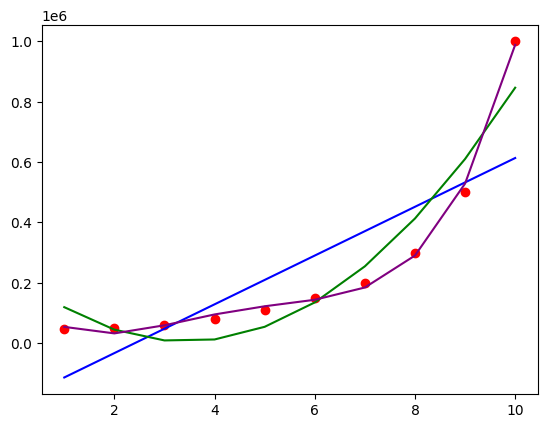

In [239]:
# Plot input points
plt.scatter(X, y, color = 'red')
# # # Plot linear regression predictions
plt.plot(X, y_pred, color = 'blue')
# # # # Plot polynomial regression predictions
plt.plot(X, y_pred2, color = 'green')
# # # # Plot polynomial regression predictions for degree 4
plt.plot(X, y_pred4, color = 'purple')

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_74820/1990486195.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_fin = np.arange(min(X), max(X), 0.1)


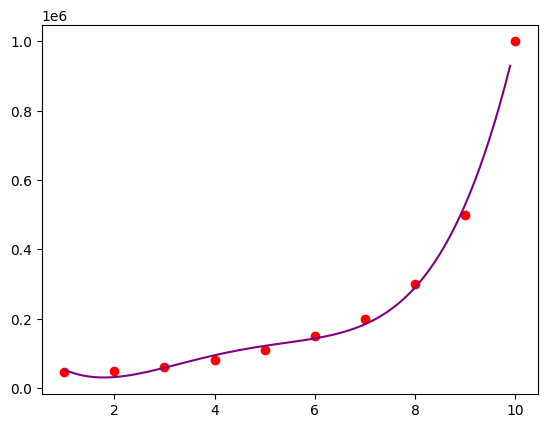

In [240]:
# Plot smoother curve for polynomial regression predictions for degree 4
# using a finer grain of data
X_fin = np.arange(min(X), max(X), 0.1)
X_fin = X_fin.reshape((len(X_fin), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_fin, lr4.predict(pf4.fit_transform(X_fin)), color = 'purple')

#### Predict output for a single value

In [61]:
# Predict using linear regression model
print("Linear Model Predicted value is: ", lr.predict([[6.5]]))

# Predict using polynomial regression model of degree 2
print("Poly2 Model Predicted value is: ", lr2.predict(pf.transform([[6.5]])))

# Predict using polynomial regression model of degree 2
print("Poly2 Model Predicted value is: ", lr4.predict(pf4.transform([[6.5]])))

Linear Model Predicted value is:  [330378.79]
Poly2 Model Predicted value is:  [189498.11]
Poly2 Model Predicted value is:  [158862.45]


### With Multiple Independent Variables

#### Data Prep

##### Read

In [244]:
dataset = pd.read_csv('data/uci_combined_cycle_power_plant.csv')
dataset.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


In [245]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables

y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(9568, 4)
<class 'numpy.ndarray'>
(9568,)


#### Train Test Split

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Build Model and Predict

In [247]:
# Test using linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
print (lr.intercept_)
print (lr.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x'.format(lr.intercept_, lr.coef_[0]))

452.8410371616386
[-1.97 -0.24  0.06 -0.16]
Estimated function: y = 452.84 + -1.97x


In [248]:
# Predict
y_pred = lr.predict(X_test)
y_pred

array([431.43, 458.56, 462.75, ..., 469.52, 442.42, 461.88])

In [249]:
from sklearn.preprocessing import PolynomialFeatures

In [250]:
# Generate more features
num_features = 2
pf = PolynomialFeatures(degree=num_features, include_bias=False)
X2_train = pf.fit_transform(X_train)

In [254]:
# Test with polynomial regression
lr2 = LinearRegression()
lr2.fit(X2_train, y_train)
print (lr2.intercept_)
print (lr2.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x + {:.2f}x^2'.format(lr2.intercept_, lr2.coef_[0], lr2.coef_[1]))

-7427.076511465573
[-4.82e+00 -3.19e+00  1.55e+01  3.74e+00  1.54e-02  1.18e-02  2.23e-03
 -6.66e-03 -1.31e-03  2.72e-03  5.40e-04 -7.54e-03 -3.43e-03 -1.91e-03]
Estimated function: y = -7427.08 + -4.82x + -3.19x^2


In [255]:
# Predict
y_pred2 = lr2.predict(pf.transform(X_test))
y_pred2

array([432.77, 457.41, 462.02, ..., 468.92, 441.36, 461.12])

In [256]:
# Test with polynomial regression for degree 4
num_features = 4
pf4 = PolynomialFeatures(degree=num_features, include_bias=False)
X4_train = pf4.fit_transform(X_train)
lr4 = LinearRegression()
lr4.fit(X4_train, y_train)
print (lr4.intercept_)
print (lr4.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x + {:.2f}x^2 + {:.2f}x^3 + {:.2f}x^4'.format(lr4.intercept_, lr4.coef_[0], lr4.coef_[1], lr4.coef_[2], lr4.coef_[3]))

66093.90969724504
[-2.48e-01 -1.48e+02  8.02e+01  2.78e+02 -1.06e+02 -1.17e+02  1.41e+01
 -8.48e+01  1.01e+02 -8.84e+00  7.10e+00 -5.02e-01 -2.77e-01  1.84e-01
 -2.49e-01  6.51e-01  1.98e-01 -8.38e-02 -1.09e-01  2.07e-01  1.46e-01
 -2.73e-02  1.72e-01 -5.27e-02 -2.58e-02 -1.92e-01 -8.55e-03  1.79e-02
 -2.07e-02  2.89e-02  5.02e-04 -2.36e-04  6.48e-04 -5.33e-03 -1.71e-04
  1.21e-04  2.48e-04  2.74e-05 -1.53e-04 -6.28e-04 -2.23e-05 -9.23e-05
  7.50e-05  3.45e-05  5.44e-05  1.05e-04 -3.28e-05 -9.03e-05 -1.36e-04
 -1.56e-05  1.32e-05 -8.73e-05  4.72e-05  1.85e-05 -7.83e-06  2.64e-05
  6.25e-06  9.08e-05  7.46e-06  9.66e-07 -8.91e-06  1.34e-05 -2.85e-05
  1.27e-06 -1.45e-07  2.27e-07 -6.57e-07  4.18e-06  2.11e-06]
Estimated function: y = 66093.91 + -0.25x + -147.82x^2 + 80.20x^3 + 277.74x^4


In [258]:
# Predict
y_pred4 = lr4.predict(pf4.transform(X_test))
y_pred4

array([433.94, 457.91, 460.53, ..., 469.53, 438.27, 461.66])

#### Check Predictions

In [259]:
# set display options
np.set_printoptions(precision=2)

In [260]:
# Convert test and predicted arrays to vertical arrays
y_test = y_test.reshape(len(y_test),1)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred2 = y_pred2.reshape(len(y_pred2),1)
y_pred4 = y_pred4.reshape(len(y_pred4),1)

In [261]:
# Print test and pred arrays side by side
comp_df = pd.DataFrame(np.concatenate((y_test,y_pred,y_test-y_pred,y_pred2,y_test-y_pred2,y_pred4,y_test-y_pred4),axis=1))
comp_df.columns = ['test','pred','test-pred','pred2','test-pred2','pred4','test-pred4']
comp_df

,test,pred,test-pred,pred2,test-pred2,pred4,test-pred4
0,431.23,431.427616,-0.197616,432.769533,-1.539533,433.944217,-2.714217
1,460.01,458.561246,1.448754,457.414408,2.595592,457.906061,2.103939
2,461.14,462.752647,-1.612647,462.023073,-0.883073,460.534039,0.605961
3,445.90,448.595962,-2.695962,447.831655,-1.931655,447.563181,-1.663181
4,451.29,457.870777,-6.580777,456.427321,-5.137321,457.211337,-5.921337
...,...,...,...,...,...,...,...
1909,460.29,463.634916,-3.344916,462.692026,-2.402026,463.468726,-3.178726
1910,452.42,457.035484,-4.615484,455.041952,-2.621952,455.977799,-3.557799
1911,473.26,469.518359,3.741641,468.919390,4.340610,469.529007,3.730993
1912,438.00,442.417595,-4.417595,441.356836,-3.356836,438.265915,-0.265915


#### Evaluate

In [262]:
from sklearn.metrics import r2_score
print("R2 Score for linear model: ",r2_score(y_test, y_pred))
print("R2 Score for polynomial model of degree2: ",r2_score(y_test, y_pred2))
print("R2 Score for polynomial model of degree4: ",r2_score(y_test, y_pred4))

R2 Score for linear model:  0.9325315554761302
R2 Score for polynomial model of degree2:  0.9421687659462179
R2 Score for polynomial model of degree4:  0.9458201289947437


## Support Vector Regression

### With Single Independent Variable

#### Data Prep

##### Read

In [38]:
dataset = pd.read_csv('data/Polynomial_Reg_data.csv')
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [39]:
X = dataset.iloc[:, 1:-1].values   # Get all Rows and All but last column - independent variables
# For this dataset the second column represents the numerical version of the first column 
# so we dont need to pull in the first column
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(10, 1)
<class 'numpy.ndarray'>
(10,)


In [40]:
# Transform y into a vector before scaling
y = y[:, np.newaxis]
# print("y Values: ", y)
print("y Shape: ", y.shape)

y Shape:  (10, 1)


#### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# When scaling both the dependent and independent variables, 
# we do not fit_transform X and just apply fit to y 
# as the standard deviation and mean of X is very different from that of y 
# and applying a standard scaling fit based on X transform willl not help in scaling y
# For the same reason we should also use separate StandardScaler objects
sc_x = StandardScaler()
sc_y = StandardScaler()
# Apply feature scaling to both independent and dependent variables
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)  

# print("Scaled X Values: ", X)
# print("Scaled y Values: ", y)

#### Build Model and Predict

In [43]:
from sklearn.svm import SVR
r_svr = SVR(kernel = 'rbf')  #using radial basis function kernel
r_svr.fit(X,y)

/Users/pauls/opt/anaconda3/envs/home-venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [47]:
# Predict
y_pred = sc_y.inverse_transform(r_svr.predict(X).reshape(-1,1))
type(y_pred), y_pred.shape

(numpy.ndarray, (10, 1))

#### Vizualize

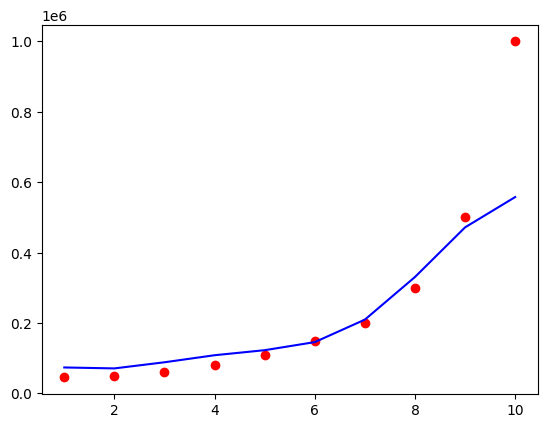

In [49]:
# Plot input points
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(X), y_pred, color = 'blue')
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_4307/294192965.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_fin = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)


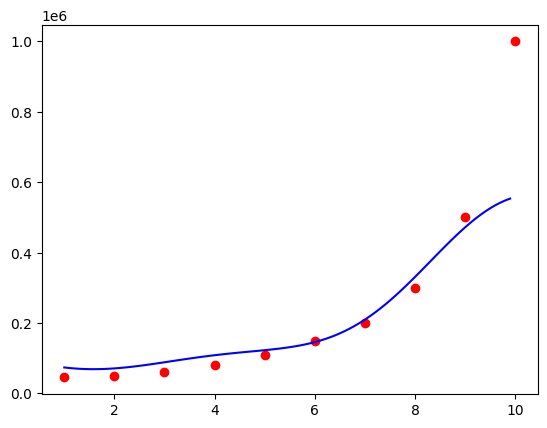

In [18]:
# Plot smoother curve for polynomial regression predictions for degree 4
# using a finer grain of data
X_fin = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_fin = X_fin.reshape((len(X_fin), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_fin, sc_y.inverse_transform(r_svr.predict(sc_x.transform(X_fin)).reshape(-1,1)), color = 'blue')
plt.show()

#### Predict output for a single value

In [19]:
sc_y.inverse_transform(r_svr.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### With Multiple Independent Variables

#### Data Prep

##### Read

In [293]:
dataset = pd.read_csv('data/uci_combined_cycle_power_plant.csv')
dataset.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


In [294]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(9568, 4)
<class 'numpy.ndarray'>
(9568,)


In [297]:
# Transform y into a vector before scaling
y = y[:, np.newaxis]
# print("y Values: ", y)
print("y Shape: ", y.shape)

y Shape:  (9568, 1)


#### Train Test Split

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [295]:
from sklearn.preprocessing import StandardScaler

In [299]:
# When scaling both the dependent and independent variables, 
# we do not fit_transform X and just apply fit to y 
# as the standard deviation and mean of X is very different from that of y 
# and applying a standard scaling fit based on X transform willl not help in scaling y
# For the same reason we should also use separate StandardScaler objects
sc_x = StandardScaler()
sc_y = StandardScaler()
# Apply feature scaling to both independent and dependent variables
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)  

# print("Scaled X Values: ", X)
# print("Scaled y Values: ", y)

#### Build Model and Predict

In [300]:
from sklearn.svm import SVR
r_svr = SVR(kernel = 'rbf')  #using radial basis function kernel
r_svr.fit(X_train,y_train)

/Users/pauls/opt/anaconda3/envs/home-venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [305]:
# Predict
y_pred = sc_y.inverse_transform(r_svr.predict(sc_x.transform(X_test)).reshape(-1,1))
type(y_pred), y_pred.shape

(numpy.ndarray, (1914, 1))

#### Check Predictions

In [306]:
# Print test and pred arrays side by side
comp_df = pd.DataFrame(np.concatenate((y_test,y_pred, y_test-y_pred),axis=1))
comp_df.columns = ['test','pred','test-pred']
comp_df

,test,pred,test-pred
0,431.23,434.052429,-2.822429
1,460.01,457.938102,2.071898
2,461.14,461.031139,0.108861
3,445.90,448.630305,-2.730305
4,451.29,457.832447,-6.542447
...,...,...,...
1909,460.29,462.638710,-2.348710
1910,452.42,455.347653,-2.927653
1911,473.26,470.602685,2.657315
1912,438.00,439.416535,-1.416535


#### Evaluate

In [307]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9480784049986258

## Decision Tree Regression

### With Single Independent Variable

#### Data Prep

##### Read

In [50]:
dataset = pd.read_csv('data/Polynomial_Reg_data.csv')
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [51]:
X = dataset.iloc[:, 1:-1].values   # Get all Rows and All but last column - independent variables
# For this dataset the second column represents the numerical version of the first column 
# so we dont need to pull in the first column
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(10, 1)
<class 'numpy.ndarray'>
(10,)


#### Build Model and Predict

In [52]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state = 0) 
r_dt.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [53]:
# Predict
y_pred = r_dt.predict(X)
type(y_pred), y_pred.shape

(numpy.ndarray, (10,))

#### Vizualize

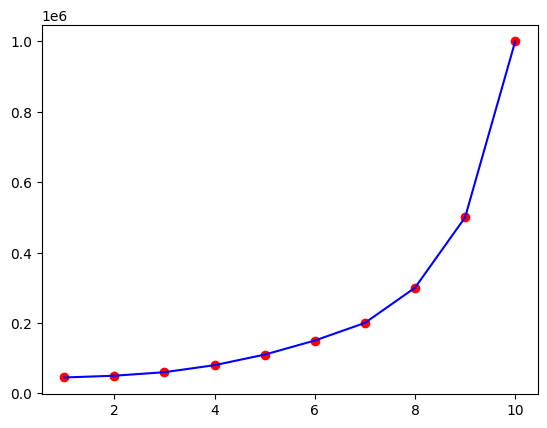

In [54]:
# Plot input points
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_4307/2134159840.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_fin = np.arange(min(X), max(X), 0.01)


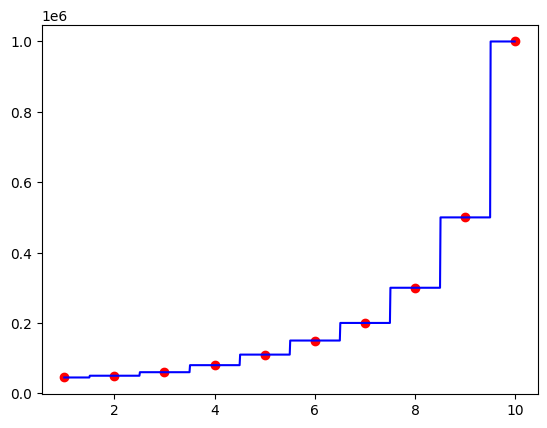

In [55]:
# Plot smoother curve for polynomial regression predictions for degree 4
# using a finer grain of data
X_fin = np.arange(min(X), max(X), 0.01)
X_fin = X_fin.reshape((len(X_fin), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_fin, r_dt.predict(X_fin), color = 'blue')
plt.show()

#### Predict output for a single value

In [56]:
r_dt.predict([[6.5]])

array([150000.])

### With Multiple Independent Variables

#### Data Prep

##### Read

In [308]:
dataset = pd.read_csv('data/uci_combined_cycle_power_plant.csv')
dataset.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


In [309]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(9568, 4)
<class 'numpy.ndarray'>
(9568,)


#### Train Test Split

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Build Model and Predict

In [311]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state = 0)
r_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [313]:
# Predict
y_pred = r_dt.predict(X_test)
type(y_pred), y_pred.shape

(numpy.ndarray, (1914,))

#### Check Predictions

In [314]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test.shape)
print("\nPredicted array shape before change: ", y_pred.shape)
y_pred = y_pred.reshape(len(y_pred),1)
print("Predicted array shape after change: ", y_pred.shape)

Test array shape before change:  (1914,)
Test array shape after change:  (1914, 1)

Predicted array shape before change:  (1914,)
Predicted array shape after change:  (1914, 1)


In [315]:
# Print test and pred arrays side by side
comp_df = pd.DataFrame(np.concatenate((y_test,y_pred, y_test-y_pred),axis=1))
comp_df.columns = ['test','pred','test-pred']
comp_df

,test,pred,test-pred
0,431.23,431.28,-0.05
1,460.01,459.59,0.42
2,461.14,460.06,1.08
3,445.90,452.71,-6.81
4,451.29,459.61,-8.32
...,...,...,...
1909,460.29,460.47,-0.18
1910,452.42,454.88,-2.46
1911,473.26,471.46,1.80
1912,438.00,437.76,0.24


#### Evaluate

In [316]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.922905874177941

## Random Forest Regression

### With Single Independent Variable

#### Data Prep

##### Read

In [57]:
dataset = pd.read_csv('data/Polynomial_Reg_data.csv')
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [58]:
X = dataset.iloc[:, 1:-1].values   # Get all Rows and All but last column - independent variables
# For this dataset the second column represents the numerical version of the first column 
# so we dont need to pull in the first column
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(10, 1)
<class 'numpy.ndarray'>
(10,)


#### Build Model and Predict

In [59]:
from sklearn.ensemble import RandomForestRegressor
r_rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 
r_rf.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [60]:
# Predict
y_pred = r_rf.predict(X)
type(y_pred), y_pred.shape

(numpy.ndarray, (10,))

#### Vizualize

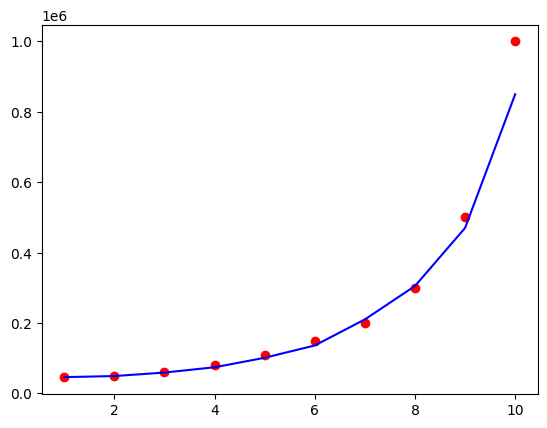

In [61]:
# Plot input points
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.show()

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_4307/1146100107.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_fin = np.arange(min(X), max(X), 0.01)


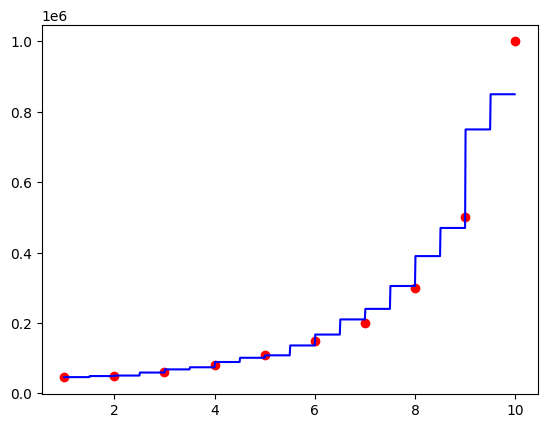

In [62]:
# Plot smoother curve for polynomial regression predictions for degree 4
# using a finer grain of data
X_fin = np.arange(min(X), max(X), 0.01)
X_fin = X_fin.reshape((len(X_fin), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_fin, r_rf.predict(X_fin), color = 'blue')
plt.show()

#### Predict output for a single value

In [63]:
r_rf.predict([[6.5]])

array([167000.])

### With Multiple Independent Variables

#### Data Prep

##### Read

In [317]:
dataset = pd.read_csv('data/uci_combined_cycle_power_plant.csv')
dataset.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


In [318]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(9568, 4)
<class 'numpy.ndarray'>
(9568,)


#### Train Test Split

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Build Model and Predict

In [325]:
from sklearn.ensemble import RandomForestRegressor
# Model with 10 estimators
r_rf_10 = RandomForestRegressor(n_estimators = 10, random_state = 0)
r_rf_10.fit(X_train, y_train)
# Model with 15 estimators
r_rf_15 = RandomForestRegressor(n_estimators = 15, random_state = 0)
r_rf_15.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

In [326]:
# Predict using 10 estimator model
y_pred_10 = r_rf_10.predict(X_test)
type(y_pred_10), y_pred_10.shape
# Predict using 15 estimator model
y_pred_15 = r_rf_15.predict(X_test)
type(y_pred_15), y_pred_15.shape

(numpy.ndarray, (1914,))

#### Check Predictions

In [327]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test.shape)
print("\n10 estimator Predicted array shape before change: ", y_pred_10.shape)
y_pred_10 = y_pred_10.reshape(len(y_pred_10),1)
print("10 estimator Predicted array shape after change: ", y_pred_10.shape)
print("\n15 estimator Predicted array shape before change: ", y_pred_15.shape)
y_pred_15 = y_pred_15.reshape(len(y_pred_15),1)
print("15 estimator Predicted array shape after change: ", y_pred_15.shape)

Test array shape before change:  (1914, 1)
Test array shape after change:  (1914, 1)

10 estimator Predicted array shape before change:  (1914,)
10 estimator Predicted array shape after change:  (1914, 1)

15 estimator Predicted array shape before change:  (1914,)
15 estimator Predicted array shape after change:  (1914, 1)


In [328]:
# Print test and pred arrays side by side
comp_df = pd.DataFrame(np.concatenate((y_test,y_pred_10, y_test-y_pred_10, y_pred_15, y_test-y_pred_15),axis=1))
comp_df.columns = ['test','pred10','test-pred10','pred15','test-pred15']
comp_df

,test,pred10,test-pred10,pred15,test-pred15
0,431.23,434.049,-2.819,433.924000,-2.694000
1,460.01,458.785,1.225,458.122667,1.887333
2,461.14,463.020,-1.880,463.362667,-2.222667
3,445.90,446.375,-0.475,446.696000,-0.796000
4,451.29,459.455,-8.165,459.972000,-8.682000
...,...,...,...,...,...
1909,460.29,460.838,-0.548,460.754667,-0.464667
1910,452.42,453.756,-1.336,453.705333,-1.285333
1911,473.26,469.479,3.781,469.096667,4.163333
1912,438.00,439.566,-1.566,439.254667,-1.254667


#### Evaluate

In [329]:
from sklearn.metrics import r2_score
print("Score with 10 estimators: ",r2_score(y_test, y_pred_10))
print("Score with 15 estimators: ",r2_score(y_test, y_pred_15))

Score with 10 estimators:  0.9615908334363876
Score with 15 estimators:  0.9632325315045367
